In [1]:
import json
import numpy as np
import pandas as pd

from pandas.io.json import json_normalize
from scipy.stats import zscore
from scipy.spatial.distance import cdist
import collections

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import umap

In [2]:
ibge = pd.read_csv("filled_ibge.csv", index_col='City')

In [3]:
with open("criminal-index-export.json", "r") as read_file:
    my_json = json.load(read_file)

my_list = []
y = []

for key, value in my_json['rio_grande_do_sul'].items():
    my_list.append(value['2018'])
    y.append(key)

crime_ = pd.DataFrame.from_records(my_list)    
y = pd.DataFrame(y)
crime_['City'] = y

crime_.set_index(['City'], inplace=True)
crime_.drop(['TOTAL'], inplace=True)

In [4]:
ibge.shape

(496, 22)

In [5]:
crime_.shape

(498, 12)

In [6]:
missing_cities = set(crime_.index) - set(ibge.index)

In [7]:
missing_cities

{'DR MAURICIO CARDOSO', 'NÃO INFORMADO'}

In [8]:
crime_ = crime_.drop(missing_cities)

In [9]:
crime_.shape

(496, 12)

In [10]:
crime_.head(5)

Delitos Relacionados à Armas e Munições   Entorpecentes - Posse  \
City                                                                           
ACEGUA                                             1                       0   
AGUA SANTA                                         1                       0   
AGUDO                                             12                      14   
AJURICABA                                          8                       3   
ALECRIM                                           15                       7   

             Entorpecentes - Tráfico   Estelionato   Furtos  \
City                                                          
ACEGUA                             0             1       62   
AGUA SANTA                         1             2       31   
AGUDO                             15            16      119   
AJURICABA                          1             7       57   
ALECRIM                            8             8       79   

             Homicídio  Doloso   Latrocínio   Roubo de Veículo   Roubos  \
City                                                                      
ACEGUA                       1            0                  1        5   
AGUA SANTA                   0            0                  2        0   
AGUDO                        2            0                  0        5   
AJURICABA                    1            0                  0        0   
ALECRIM                      1            0                  0        3   

             Veículo  Abigeato*  Total de vítimas de Homicidio Doloso  
City                                                                   
ACEGUA             1         16                                     1  
AGUA SANTA         3          3                                     0  
AGUDO              1         11                                     2  
AJURICABA          2          5                                     1  
ALECRIM            1         18                                     1

In [11]:
ibge.head(5)

fundamental_schools  fundamental_teachers       PIB  \
City                                                              
ACEGUA                        4                    45  52913.18   
AGUA SANTA                    3                    37  73762.48   
AGUDO                        10                   119  24771.79   
AJURICABA                     7                    72  35748.66   
ALECRIM                       6                    44  14880.75   

            Área da unidade territorial  Esgotamento sanitário adequado  \
City                                                                      
ACEGUA                         1551.339                            82.2   
AGUA SANTA                      291.503                            64.2   
AGUDO                           534.624                            68.1   
AJURICABA                       322.671                            17.4   
ALECRIM                         316.510                            13.9   

            Matrículas no ensino fundamental  population_last_census  \
City                                                                   
ACEGUA                                   658                    4394   
AGUA SANTA                               466                    3722   
AGUDO                                   1744                   16722   
AJURICABA                                729                    7255   
ALECRIM                                  613                    7045   

            medium_schools  Matrículas no ensino médio  medium_teachers  ...  \
City                                                                     ...   
ACEGUA                   1                         158               13  ...   
AGUA SANTA               1                         102               16  ...   
AGUDO                    2                         435               40  ...   
AJURICABA                1                         137               20  ...   
ALECRIM                  1                         150               13  ...   

            IDEB   IDHM  Urbanização de vias públicas  average_salary  \
City                                                                    
ACEGUA       5.6  0.687                          13.1             2.5   
AGUA SANTA   5.8  0.750                          15.4             2.5   
AGUDO        5.9  0.694                          27.1             2.1   
AJURICABA    6.2  0.753                          13.0             2.1   
ALECRIM      6.3  0.672                           2.1             2.1   

            demographic_density  estabelecimento_sus  estimated_population  \
City                                                                         
ACEGUA                     2.84                  3.0                4858.0   
AGUA SANTA                12.76                  4.0                3753.0   
AGUDO                     31.19                  7.0               16524.0   
AJURICABA                 22.44                  4.0                7063.0   
ALECRIM                   22.38                  7.0                6077.0   

            occupied_people  occupied_population  receitas_fontes_externas  
City                                                                        
ACEGUA                953.0                 20.1                      85.2  
AGUA SANTA            685.0                 17.8                      81.6  
AGUDO                3155.0                 18.4                      73.8  
AJURICABA            1391.0                 18.9                      87.5  
ALECRIM               669.0                  9.8                      79.7  

[5 rows x 22 columns]

In [12]:
crime_ = ( crime_ /1000 )
crime_ = crime_.apply(zscore)
ibge = (ibge / 1000)
ibge = ibge.apply(zscore)

In [13]:
total = pd.concat([crime_, ibge], axis=1)

In [14]:
total.shape

(496, 34)

In [15]:
distortions = []
K = range(1, 30)
for k in K:
    model = KMeans(n_clusters=k, max_iter=2500).fit(total)
    distortions.append(sum(np.min(cdist(total, model.cluster_centers_, 'euclidean'), axis=1)) / total.shape[0])

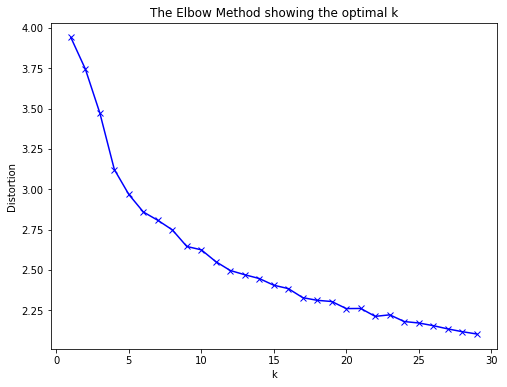

In [16]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
# model_16_centroids = KMeans(n_clusters=16, max_iter=2000).fit(total)
# result_16_centroids = model_16_centroids.predict(total)
# counter_16_centroids = collections.Counter(result_16_centroids)
# print(counter_16_centroids)

In [18]:
# model_24_centroids = KMeans(n_clusters=24, max_iter=2000).fit(total)
# result_24_centroids = model_24_centroids.predict(total)
# counter_24_centroids = collections.Counter(result_24_centroids)
# print(counter_24_centroids)

In [19]:
# model_25_centroids = KMeans(n_clusters=25, max_iter=2000).fit(total)
# result_25_centroids = model_25_centroids.predict(total)
# counter_25_centroids = collections.Counter(result_25_centroids)
# print(counter_25_centroids)

In [20]:
# model_26_centroids = KMeans(n_clusters=26, max_iter=2000).fit(total)
# result_26_centroids = model_26_centroids.predict(total)
# counter_26_centroids = collections.Counter(result_26_centroids)
# print(counter_26_centroids)

In [21]:
total

Delitos Relacionados à Armas e Munições  \
City                                                                   
ACEGUA                                                     -0.265683   
AGUA SANTA                                                 -0.265683   
AGUDO                                                      -0.031087   
AJURICABA                                                  -0.116395   
ALECRIM                                                     0.032893   
ALEGRETE                                                    0.267488   
ALEGRIA                                                    -0.244356   
ALMIRANTE TAMANDARE DO SUL                                 -0.287009   
ALPESTRE                                                   -0.116395   
ALTO ALEGRE                                                -0.287009   
ALTO FELIZ                                                 -0.287009   
ALVORADA                                                    1.675060   
AMARAL FERRADOR                                            -0.244356   
AMETISTA DO SUL                                            -0.287009   
ANDRE DA ROCHA                                             -0.265683   
ANTA GORDA                                                 -0.244356   
ANTONIO PRADO                                              -0.180375   
ARAMBARE                                                   -0.265683   
ARARICA                                                    -0.265683   
ARATIBA                                                    -0.265683   
ARROIO DO MEIO                                             -0.137722   
ARROIO DO PADRE                                            -0.265683   
ARROIO DO SAL                                              -0.137722   
ARROIO DO TIGRE                                            -0.116395   
ARROIO DOS RATOS                                           -0.073741   
ARROIO GRANDE                                              -0.116395   
ARVOREZINHA                                                -0.073741   
AUGUSTO PESTANA                                            -0.223029   
AUREA                                                      -0.265683   
BAGE                                                        1.547099   
...                                                              ...   
TUPANDI                                                    -0.265683   
TUPARENDI                                                  -0.223029   
TURUCU                                                     -0.265683   
UBIRETAMA                                                  -0.265683   
UNIAO DA SERRA                                             -0.287009   
UNISTALDA                                                  -0.265683   
URUGUAIANA                                                  0.715352   
VACARIA                                                     0.907294   
VALE DO SOL                                                -0.180375   
VALE REAL                                                  -0.287009   
VALE VERDE                                                 -0.287009   
VANINI                                                     -0.244356   
VENANCIO AIRES                                              0.331469   
VERA CRUZ                                                   0.011566   
VERANOPOLIS                                                 0.011566   
VESPASIANO CORREA                                          -0.223029   
VIADUTOS                                                   -0.287009   
VIAMAO                                                      2.336192   
VICENTE DUTRA                                              -0.137722   
VICTOR GRAEFF                                              -0.201702   
VILA FLORES                                                -0.244356   
VILA LANGARO                                               -0.265683   
VILA MARIA                                                 -0.223029 

In [22]:
result_umap = umap.UMAP(n_neighbors=15).fit_transform(total)
result_umap = pd.DataFrame(result_umap)
result_umap.columns = ['x', 'y']

In [23]:
result_umap.head(1)

x         y
0  3.606946  0.134743

In [24]:
cities = pd.DataFrame(total.index.values)
cities.columns = ['City']

In [25]:
cities.head(1)

City
0  ACEGUA

In [26]:
model = KMeans(n_clusters=9, max_iter=1000).fit(total)
result_9_centroids = model.predict(total)

result = pd.DataFrame(result_9_centroids)
result.columns = ['Label']

In [27]:
# result = pd.DataFrame(result_24_centroids)
# result.columns = ['Label']

In [28]:
result.head(1)

Label
0      5

In [29]:
frames = [cities, result_umap, result]
final = pd.concat(frames, axis=1)
final = final.set_index('City')
final.to_csv("clustering_total_data.csv", index=False)
final.to_json(r'clustering_total_data.json', orient='index')

In [30]:
final.head(5)

x         y  Label
City                                 
ACEGUA      3.606946  0.134743      5
AGUA SANTA  1.778596  1.297999      8
AGUDO       1.490251  0.810998      8
AJURICABA   3.416009  2.470571      8
ALECRIM     4.690197  0.524133      5

In [31]:
final.index

Index(['ACEGUA', 'AGUA SANTA', 'AGUDO', 'AJURICABA', 'ALECRIM', 'ALEGRETE',
       'ALEGRIA', 'ALMIRANTE TAMANDARE DO SUL', 'ALPESTRE', 'ALTO ALEGRE',
       ...
       'VILA FLORES', 'VILA LANGARO', 'VILA MARIA', 'VILA NOVA DO SUL',
       'VISTA ALEGRE', 'VISTA ALEGRE DO PRATA', 'VISTA GAUCHA',
       'VITORIA DAS MISSOES', 'WESTFALIA', 'XANGRI-LA'],
      dtype='object', name='City', length=496)